#  Data analysis on database created in connection.py

**Importing essential libraries and connecting to the database**

In [41]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()


engine = create_engine(
    f"postgresql+psycopg2://{os.getenv('User')}:{os.getenv('Password')}"
    f"@{os.getenv('Host')}/{os.getenv('DBname')}"
)


**loading data into a dataframe using a join query on my existing database**

In [42]:
query= """SELECT sales.product,sales.amount,sales.date,customer.name,customer.city
           FROM sales
            JOIN customer ON sales.customer_id=customer.id"""

df= pd.read_sql(query, engine)


**Looking at the created Dataframe**

In [43]:
df

,product,amount,date,name,city
0,Institution,810.0,2025-01-11,Audrey Blair MD,Davidtown
1,Stand,617.0,2025-01-15,Robert Mendoza,North Jessicamouth
2,Million,313.0,2025-04-25,Gary Harrison,Johnsonfort
3,Human,880.0,2025-11-15,Kimberly Gonzalez,Cruzton
4,Forget,800.0,2025-01-28,Kyle Long,Ericmouth
...,...,...,...,...,...
195,Tax,852.0,2025-07-13,Tiffany Young,New Gregoryport
196,Well,614.0,2025-07-24,Rose Mills,Davidburgh
197,Turn,676.0,2025-05-13,Paul Chavez,Pennyfort
198,Newspaper,788.0,2025-11-30,Rebecca Chavez,North Adrian


**Looking at nans or duplicated values(if any, likely not for this scenario):**

In [44]:
print(df.isna().sum())
print(df.duplicated().sum())

product    0
amount     0
date       0
name       0
city       0
dtype: int64
0


**Checking if columns with duplicate values exist**

In [45]:
d_columns = {y: df[y].duplicated().sum() for y in df.columns }

for col, count in d_columns.items():
    print(f"{col}: {count}")




product: 20
amount: 21
date: 37
name: 117
city: 119


**checking basic info and describing the data**

In [46]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  200 non-null    object 
 1   amount   200 non-null    float64
 2   date     200 non-null    object 
 3   name     200 non-null    object 
 4   city     200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.9+ KB
None
          amount
count  200.00000
mean   645.87000
std    200.69756
min    305.00000
25%    482.00000
50%    642.00000
75%    810.25000
max    999.00000


# Analysis:

**Total sales by product(Fake data generated using fakers,names are random)**

In [47]:
sales= df.groupby('product')['amount'].sum()
sales

product
According     551.0
Actually      766.0
Add           904.0
Address       328.0
Again        1567.0
              ...  
Wonder        424.0
World         372.0
Worry        1734.0
Would         694.0
Yeah          524.0
Name: amount, Length: 180, dtype: float64

**Top 10 product with most sales**

In [48]:
most_sales= sales.sort_values(ascending=False).head(10)
most_sales_df= most_sales.reset_index()
most_sales_df


,product,amount
0,Series,1852.0
1,Tax,1804.0
2,Worry,1734.0
3,Again,1567.0
4,Mr,1520.0
5,Through,1486.0
6,Them,1466.0
7,Well,1456.0
8,Where,1394.0
9,Music,1286.0


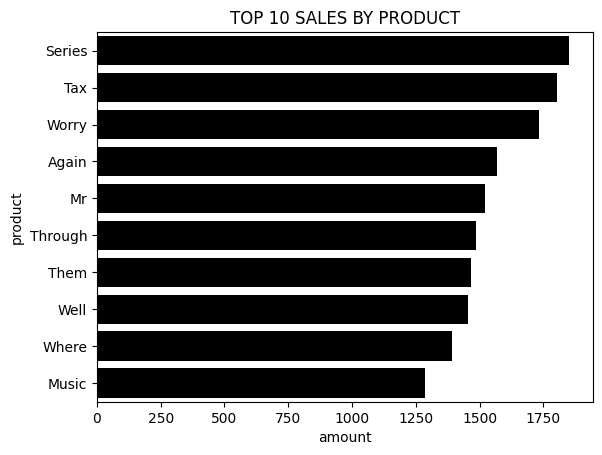

In [52]:
sns.barplot(data=most_sales_df, x='amount', y='product', color='black')
plt.title('TOP 10 SALES BY PRODUCT')
plt.show()

**Sales by city**

In [58]:
city= df.groupby('city')['amount'].sum()

**City with most purchases**

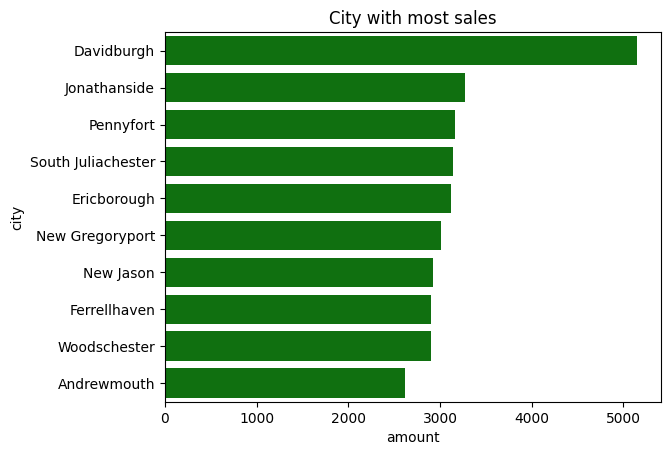

In [62]:
most_purchases= city.sort_values(ascending=False).head(10)
most_purchases_df= most_purchases.reset_index()

sns.barplot(data=most_purchases_df, x='amount', y='city', color='green')
plt.title("City with most sales")
plt.show()

**Monthly trends analysis**

In [ ]:
# converting date which is in object to date_time data type 
df['date']=pd.to_datetime(df['date'])

# creating month column for better understanding and analysis
df['month']= df['date'].dt.to_period('M')


,product,amount,date,name,city,month
0,Institution,810.0,2025-01-11,Audrey Blair MD,Davidtown,2025-01
1,Stand,617.0,2025-01-15,Robert Mendoza,North Jessicamouth,2025-01
2,Million,313.0,2025-04-25,Gary Harrison,Johnsonfort,2025-04
3,Human,880.0,2025-11-15,Kimberly Gonzalez,Cruzton,2025-11
4,Forget,800.0,2025-01-28,Kyle Long,Ericmouth,2025-01
...,...,...,...,...,...,...
195,Tax,852.0,2025-07-13,Tiffany Young,New Gregoryport,2025-07
196,Well,614.0,2025-07-24,Rose Mills,Davidburgh,2025-07
197,Turn,676.0,2025-05-13,Paul Chavez,Pennyfort,2025-05
198,Newspaper,788.0,2025-11-30,Rebecca Chavez,North Adrian,2025-11
